# Notebook 1 - Model Selection

This notebook contains the code snippets we used for selecting and evaluating the selected model with preprocessed training dataset.

### Install Required Dependancies

In [1]:
!pip install fuzzywuzzy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install word2number

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5589 sha256=8ca98a3205f03054463b189841342bcee22b5adda05766a8819b83bdb2f74d2d
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pyspellchecker

  Obtaining dependency information for pyspellchecker from https://files.pythonhosted.org/packages/e1/d2/c7e3b3a61a34b9320399fa731d1f9f0c73db8a1f28c6764e9e11efa68a29/pyspellchecker-0.8.1-py3-none-any.whl.metadata
  Using cached pyspellchecker-0.8.1-py3-none-any.whl.metadata (9.4 kB)
Using cached pyspellchecker-0.8.1-py3-none-any.whl (6.8 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Dependancies

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

import re
from word2number import w2n
from spellchecker import SpellChecker
from scipy.stats import chi2_contingency

In [6]:
# Loading the dataset
data = pd.read_csv("./data/train_kaggle.csv")

C:\Users\Acer\AppData\Local\Temp\ipykernel_9628\2350853144.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/train_kaggle.csv")


## Exploratory Data Analysis (EDA)

In [7]:
# Checking the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (774155, 6)


In [8]:
data.head(100)

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
95,10627121.0,Nuwara Eliya,1677.51,1059.48,6003.72,4
96,10239595.0,Dehiwala-Mount Lavinia,1253.24,791.52,4419.32,4
97,10575736.0,Panadura,1744.16,1417.13,7194.66,4
98,10631593.0,Nuwara Eliya,1649.4,1429.48,7477.28,4


In [9]:
# Checking the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6       756.0    5292.0                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala      2288.88     1481.04   9155.52                4
3   10334589.0     Wattala      2274.94     1739.66   9099.76                4
4   10458365.0    Kelaniya      2345.49     2069.55   9243.99                4


In [10]:
#Rename cluster column
data = data.rename(columns={'cluster_catgeory': 'cluster_category'})

In [11]:
# Checking size and dimensions of dataset
data.shape

(774155, 6)

In [12]:
# Checking the summary statistics of the dataset
print("Summary statistics of the dataset:")
print(data.describe())

Summary statistics of the dataset:
        Customer_ID
count  7.741530e+05
mean   1.038708e+07
std    2.234795e+05
min    1.000000e+07
25%    1.019354e+07
50%    1.038708e+07
75%    1.058062e+07
max    1.077415e+07


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_category  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [14]:
# Checking the data types of the columns
print("Data types of the columns:")
print(data.dtypes)

Data types of the columns:
Customer_ID         float64
outlet_city          object
luxury_sales         object
fresh_sales          object
dry_sales            object
cluster_category     object
dtype: object


## Check for Strings in Sales Columns

In [15]:
non_numeric_count1 = data['luxury_sales'].isna().sum()
non_numeric_count2 = data['fresh_sales'].isna().sum()
non_numeric_count3 = data['dry_sales'].isna().sum()

print("Count of non-numeric values in 'dry_sales' column:", non_numeric_count3)
print("Count of non-numeric values in 'fresh_sales' column:", non_numeric_count2)
print("Count of non-numeric values in 'luxury_sales' column:", non_numeric_count1)

Count of non-numeric values in 'dry_sales' column: 30
Count of non-numeric values in 'fresh_sales' column: 41
Count of non-numeric values in 'luxury_sales' column: 35


In [16]:
# Function to check if a value contains words
def contains_words(s):
    if isinstance(s, str):
        return bool(re.search('[a-zA-Z]', s))
    return False

rows_with_words = []

# Find all cells with words and print their locations
for col in ['luxury_sales','fresh_sales','dry_sales']:
    for idx, value in data[col].items():
        if contains_words(value):
            rows_with_words.append(idx)
            print(f"Cell at row {idx}, column '{col}' contains words: '{value}'")

Cell at row 80043, column 'luxury_sales' contains words: 'One thousand four hundread ruppes'
Cell at row 175278, column 'luxury_sales' contains words: 'nul'
Cell at row 296621, column 'luxury_sales' contains words: 'nul'
Cell at row 297911, column 'luxury_sales' contains words: 'Eight hundread ruppess'
Cell at row 326593, column 'luxury_sales' contains words: 'six hundread and hirty '
Cell at row 367935, column 'luxury_sales' contains words: 'nul'
Cell at row 497177, column 'luxury_sales' contains words: 'Thousand tow hundread '
Cell at row 497245, column 'luxury_sales' contains words: 'seven hundread and nine ruppees'
Cell at row 558562, column 'luxury_sales' contains words: 'Three thousand two hundread ruppess'
Cell at row 753131, column 'luxury_sales' contains words: 'Four thousand one hundread ruppess'
Cell at row 161810, column 'fresh_sales' contains words: 'Six hundread and five ruppes'
Cell at row 174714, column 'fresh_sales' contains words: 'nul'
Cell at row 268571, column 'fre

In [17]:
print(rows_with_words)

[80043, 175278, 296621, 297911, 326593, 367935, 497177, 497245, 558562, 753131, 161810, 174714, 268571, 326334, 327495, 327505, 558897, 752816, 753256, 148029, 174631, 174720, 175278, 268571, 296621, 327495, 327505]


In [18]:
# Initialize the spell checker
spell = SpellChecker()

# Function to correct spelling errors
def correct_spelling(text):
    corrected_words = [spell.correction(word) for word in text.split()]
    return ' '.join(corrected_words)

# Function to convert worded numbers to numerical values with error handling
def convert_words_to_numbers(text):
    try:
        cleaned_text = correct_spelling(text)
        return w2n.word_to_num(cleaned_text)
    except (ValueError, IndexError):
        return text

# Columns to be checked and converted
columns_to_convert = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Apply the correction and conversion function to the specified columns
for col in columns_to_convert:
    data[col] = data[col].apply(lambda x: convert_words_to_numbers(x) if isinstance(x, str) else x)

# Print specific rows after transformation
print("\nAfter transformation:\n", data.loc[rows_with_words])


After transformation:
         Customer_ID             outlet_city            luxury_sales  \
80043    10774052.0                Kelaniya                    1400   
175278   10347733.0              Peliyagoda                     nul   
296621   10215937.0                Panadura                     nul   
297911   10189925.0                Kelaniya                     800   
326593   10467590.0            Nuwara Eliya                     600   
367935   10445384.0                   Galle                     nul   
497177   10537755.0                   Kandy  Thousand tow hundread    
497245   10468127.0                   Kandy                     709   
558562   10076064.0             Trincomalee                    3200   
753131   10695296.0              Batticaloa                    4100   
161810   10261075.0                Panadura                  887.36   
174714   10358037.0            Nuwara Eliya                 1012.34   
268571   10047014.0                Panadura          

In [19]:
data['luxury_sales'] = data['luxury_sales'].replace('Thousand tow hundread ', 1200)

In [20]:
# Print specific rows after transformation
print("\nAfter transformation:\n", data.loc[rows_with_words])


After transformation:
         Customer_ID             outlet_city luxury_sales fresh_sales  \
80043    10774052.0                Kelaniya         1400      1118.0   
175278   10347733.0              Peliyagoda          nul     4286.28   
296621   10215937.0                Panadura          nul     8155.11   
297911   10189925.0                Kelaniya          800     4003.84   
326593   10467590.0            Nuwara Eliya          600      3420.3   
367935   10445384.0                   Galle          nul     1919.13   
497177   10537755.0                   Kandy         1200      2041.0   
497245   10468127.0                   Kandy          709     1032.48   
558562   10076064.0             Trincomalee         3200     10416.9   
753131   10695296.0              Batticaloa         4100     4286.72   
161810   10261075.0                Panadura       887.36         605   
174714   10358037.0            Nuwara Eliya      1012.34         nul   
268571   10047014.0                Panad

## Converting to correct data types

In [21]:
# Convert to numeric
data['luxury_sales'] = pd.to_numeric(data['luxury_sales'], errors='coerce')
data['fresh_sales'] = pd.to_numeric(data['fresh_sales'], errors='coerce')
data['dry_sales'] = pd.to_numeric(data['dry_sales'], errors='coerce')

# Convert to categorical
data['cluster_category'] = data['cluster_category'].astype('category')
data['Customer_ID'] = data['Customer_ID'].astype('category')

In [22]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [23]:
data.dtypes

Customer_ID         category
outlet_city           object
luxury_sales         float64
fresh_sales          float64
dry_sales            float64
cluster_category    category
dtype: object

## Exploring the Outlet Cities

In [24]:
# How many clusters in dataset
cities = data['outlet_city'].unique()
print(list(cities))

['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama', 'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda', 'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna', 'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo', 'Trincomalee', 'Kandy', nan]


In [25]:
# Replace 'nan' with Anuradhapura or Madawachchiya, since it is in the Test Data for submission
#data['outlet_city'].fillna('Anuradhapura', inplace=True)

In [26]:
# # How many clusters in dataset
# cities = data['outlet_city'].unique()
# print(list(cities))

In [27]:
city_counts = data['outlet_city'].value_counts()
print(city_counts)

outlet_city
Colombo                   41031
Batticaloa                41012
Galle                     41010
Kalmunai                  40711
Negombo                   40703
Jaffna                    40675
Katunayake                40649
Kandy                     40534
Trincomalee               40528
Gampaha                   40252
Peliyagoda                37151
Nuwara Eliya              37102
Dehiwala-Mount Lavinia    36839
Kotte                     36788
Panadura                  36726
Wattala                   36721
Kaduwela                  36695
Homagama                  36639
Moratuwa                  36417
Kelaniya                  35970
Name: count, dtype: int64


## Fixing errors in clusters

In [28]:
# How many clusters in dataset
categories = data['cluster_category'].unique()
print(list(categories))

['4', '1', '99', '2', '5', '3', '6', '6\\', 4, 2, 1, 95, 3, 98, 5, 6, nan, 100.0, 89.0]


In [29]:
# Convert 'cluster_category' to string for consistency
data['cluster_category'] = data['cluster_category'].astype(str)
category_counts = data['cluster_category'].value_counts()
print(category_counts)

cluster_category
1        188984
4        172439
6        169214
2        155064
3         48907
5         39540
99            1
6\            1
95            1
98            1
nan           1
100.0         1
89.0          1
Name: count, dtype: int64


In [30]:
# Remove extra characters
data['cluster_category'] = data['cluster_category'].str.replace('\\', '')

In [31]:
# Define the valid categories
valid_categories = ['1', '2', '3', '4', '5', '6']

# Keep only the rows where 'cluster_category' is one of the valid categories
data = data[data['cluster_category'].isin(valid_categories)]

In [32]:
# How many clusters in dataset
categories = data['cluster_category'].unique()
print(list(categories))

['4', '1', '2', '5', '3', '6']


In [33]:
category_counts = data['cluster_category'].value_counts()
print(category_counts)

cluster_category
1    188984
4    172439
6    169215
2    155064
3     48907
5     39540
Name: count, dtype: int64


## Visualizations

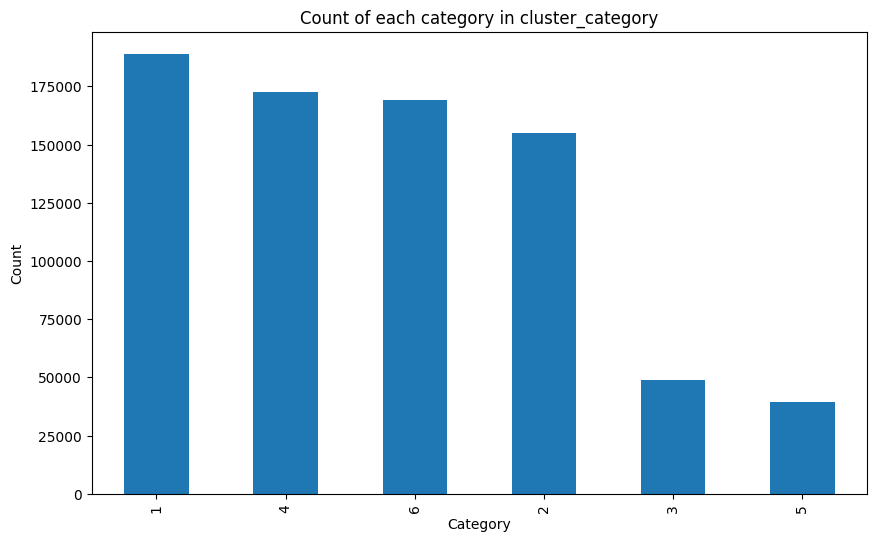

In [34]:
# Count the occurrences of each category
category_counts = data['cluster_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of each category in cluster_category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

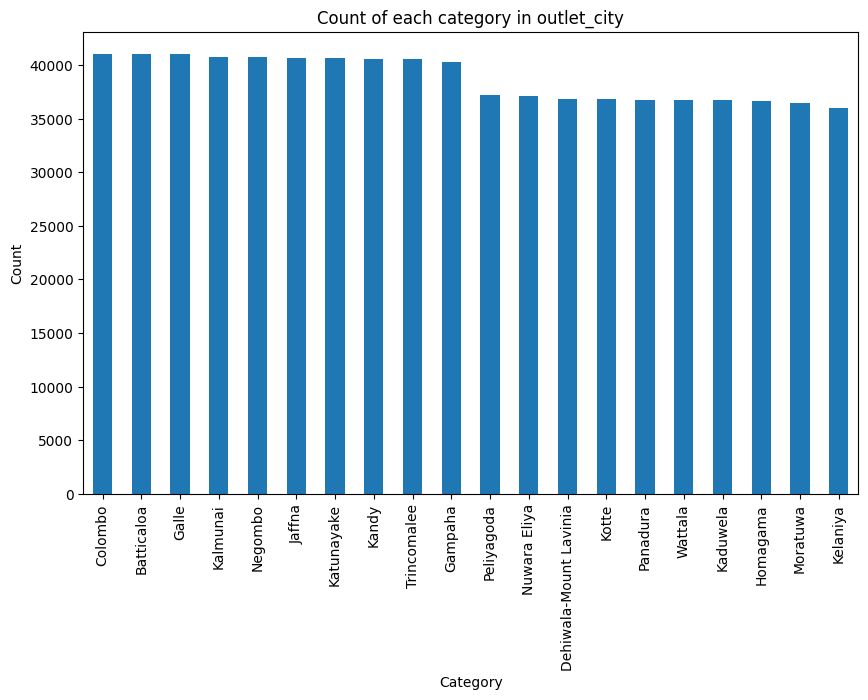

In [35]:
# Count the occurrences of each category
category_counts = data['outlet_city'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of each category in outlet_city')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Identify whether Urban or Suburban

In [36]:
# convert to lower case
data['outlet_city'] = data['outlet_city'].str.lower()
# remove trailing white spaces
data['outlet_city'] = data['outlet_city'].str.strip()

In [37]:
# Create a mapping from city to province
common_groups = {'Urban': ['colombo', 'batticaloa', 'galle', 'negombo', 'jaffna', 'katunayake', 'kandy', 'trincomalee', 'gampaha', 'peliyagoda', 'nuwara eliya', 'panadura', 'wattala',  'kalmunai'],
                 'Suburban': ['dehiwala-mount lavinia', 'kotte', 'kaduwela', 'homagama', 'moratuwa', 'kelaniya', 'anuradhapura', 'madawachchiya']}

city_to_province = {city: province for province, cities in common_groups.items() for city in cities}

# Replace the 'outlet_city' values with the corresponding province names
data['Council'] = data['outlet_city'].map(city_to_province)

In [38]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,Council
0,10493832.0,kelaniya,1209.60,756.00,5292.00,4,Suburban
1,10178643.0,moratuwa,1590.12,1060.08,6007.12,1,Suburban
2,10513916.0,wattala,2288.88,1481.04,9155.52,4,Urban
3,10334589.0,wattala,2274.94,1739.66,9099.76,4,Urban
4,10458365.0,kelaniya,2345.49,2069.55,9243.99,4,Suburban


In [39]:
data.tail()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,Council
774150,10197979.0,gampaha,3893.40,3893.40,3448.44,3,Urban
774151,10494575.0,katunayake,6095.86,5557.99,6275.15,3,Urban
774152,10565682.0,colombo,5121.42,4820.16,4669.53,3,Urban
774153,10351977.0,kandy,6311.76,6311.76,5940.48,3,Urban
774154,10637635.0,negombo,5833.50,6027.95,6611.30,3,Urban


## Check for missing values

In [40]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
Customer_ID          2
outlet_city          2
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_category     0
Council              2
dtype: int64


In [41]:
# Get the rows where 'Council' is missing
missing_council_rows = data[data['Council'].isnull()]

# Print the missing rows
print("Rows where 'Council' is missing:")
print(missing_council_rows)

Rows where 'Council' is missing:
       Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
497599  10387530.0         NaN       1309.36      1611.52    6848.96   
497703  10107604.0         NaN       1576.50      1891.80    7041.70   

       cluster_category Council  
497599                1     NaN  
497703                1     NaN  


In [42]:
# Remove Missing Rows
data = data.dropna(subset=['Customer_ID', 'outlet_city'])

In [43]:
data.shape

(774145, 7)

In [44]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
Customer_ID          0
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_category     0
Council              0
dtype: int64


In [45]:
# Identify rest of columns with missing values
cols_with_missing = data.columns[data.isnull().any()].tolist()

# For each column with missing values, fill missing values with the mean of that column for each cluster category
for col in cols_with_missing:
    data[col].fillna(data.groupby('cluster_category')[col].transform('mean'), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9628\851388350.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data.groupby('cluster_category')[col].transform('mean'), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_9628\851388350.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [46]:
#data.fillna(0, inplace=True)

In [47]:
# Checking for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
Council             0
dtype: int64


## Check for Duplicates

In [48]:
# Removing any duplicate rows
duplicate_counts = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_counts)

Number of duplicate rows: 0


In [49]:
# Are there multiple entries from a customer
duplicate_id_counts = data['Customer_ID'].duplicated().sum()
print("Number of duplicate 'id' entries:", duplicate_id_counts)

Number of duplicate 'id' entries: 0


In [50]:
# Checking for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_category    0
Council             0
dtype: int64


## Cluster Means

In [51]:
# Since there are no duplicates (meaning no customer with multiple transaction), we can add a mean value of a cluster to missing Sales figures

# Calculate the mean of 'luxury_sales' for each 'cluster_category'
luxury_sales_means = data.groupby('cluster_category')['luxury_sales'].mean()
print(luxury_sales_means)

cluster_category
1    1563.122206
2    1249.626011
3    4070.673250
4    1748.637921
5    3246.496862
6    2185.058184
Name: luxury_sales, dtype: float64


In [52]:
data.dtypes

Customer_ID         category
outlet_city           object
luxury_sales         float64
fresh_sales          float64
dry_sales            float64
cluster_category      object
Council               object
dtype: object

In [53]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,Council
0,10493832.0,kelaniya,1209.60,756.00,5292.00,4,Suburban
1,10178643.0,moratuwa,1590.12,1060.08,6007.12,1,Suburban
2,10513916.0,wattala,2288.88,1481.04,9155.52,4,Urban
3,10334589.0,wattala,2274.94,1739.66,9099.76,4,Urban
4,10458365.0,kelaniya,2345.49,2069.55,9243.99,4,Suburban


## Check for Outliers

In [54]:
# # Calculate descriptive statistics
# stats = data[['luxury_sales', 'fresh_sales', 'dry_sales']].describe()

# # Calculate IQR
# Q1 = stats.loc['25%']
# Q3 = stats.loc['75%']
# IQR = Q3 - Q1

# # Define outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = data[(data['luxury_sales'] < lower_bound['luxury_sales']) |
#               (data['luxury_sales'] > upper_bound['luxury_sales']) |
#               (data['fresh_sales'] < lower_bound['fresh_sales']) |
#               (data['fresh_sales'] > upper_bound['fresh_sales']) |
#               (data['dry_sales'] < lower_bound['dry_sales']) |
#               (data['dry_sales'] > upper_bound['dry_sales'])]

# # Remove outliers from the dataset
# #data = data.drop(outliers.index)

# print(outliers)

## Explore Sales

In [55]:
bins = [0, 1000, 5000, 10000]
labels = ['low', 'medium', 'high']
data['luxury_sales_bin'] = pd.cut(data['luxury_sales'], bins=bins, labels=labels)

In [56]:
# Add a total sales column
data['total_sales'] = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']

In [57]:
# Group by 'cluster_category' and calculate the average sales
average_sales = data.groupby('cluster_category')[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales']].mean()

print(average_sales)

                  luxury_sales  fresh_sales    dry_sales   total_sales
cluster_category                                                      
1                  1563.122206  2188.487968  8436.621375  12188.231549
2                  1249.626011  6745.604152  1749.531045   9744.761209
3                  4070.673250  4071.420139  4069.969537  12212.062926
4                  1748.637921  1249.938813  6742.625732   9741.202466
5                  3246.496862  3248.645754  3246.209347   9741.351963
6                  2185.058184  8425.703615  1562.301899  12173.063698


In [58]:
# data['luxury_sales_ratio'] = data['luxury_sales'] / data['total_sales']
# data['fresh_sales_ratio'] = data['fresh_sales'] / data['total_sales']
# data['dry_sales_ratio'] = data['dry_sales'] / data['total_sales']

In [59]:
# data['luxury_sales_log'] = np.log1p(data['luxury_sales'])
# data['fresh_sales_log'] = np.log1p(data['fresh_sales'])
# data['dry_sales_log'] = np.log1p(data['dry_sales'])
# data['total_sales_log'] = np.log1p(data['total_sales'])

In [60]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,Council,luxury_sales_bin,total_sales
0,10493832.0,kelaniya,1209.60,756.00,5292.00,4,Suburban,medium,7257.60
1,10178643.0,moratuwa,1590.12,1060.08,6007.12,1,Suburban,medium,8657.32
2,10513916.0,wattala,2288.88,1481.04,9155.52,4,Urban,medium,12925.44
3,10334589.0,wattala,2274.94,1739.66,9099.76,4,Urban,medium,13114.36
4,10458365.0,kelaniya,2345.49,2069.55,9243.99,4,Suburban,medium,13659.03


### Check Correlations

In [61]:
# contingency table
contingency_table = pd.crosstab(data['cluster_category'], data['outlet_city'])
print("Contingency Table:")
print(contingency_table)

# chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the categories.")

Contingency Table:
outlet_city       batticaloa  colombo  dehiwala-mount lavinia  galle  gampaha  \
cluster_category                                                                
1                      18960    19021                       1  19034    18763   
2                          2        0                   15648      2        1   
3                       4901     4959                       0   4932     4833   
4                          0        3                   17283      1        0   
5                          2        2                    3902      3        1   
6                      17147    17046                       4  17037    16654   

outlet_city       homagama  jaffna  kaduwela  kalmunai  kandy  katunayake  \
cluster_category                                                            
1                        2   18821         1     18852  18898       19080   
2                    15464       2     15478         3      0           2   
3                       

## Data Visualization

<Axes: >

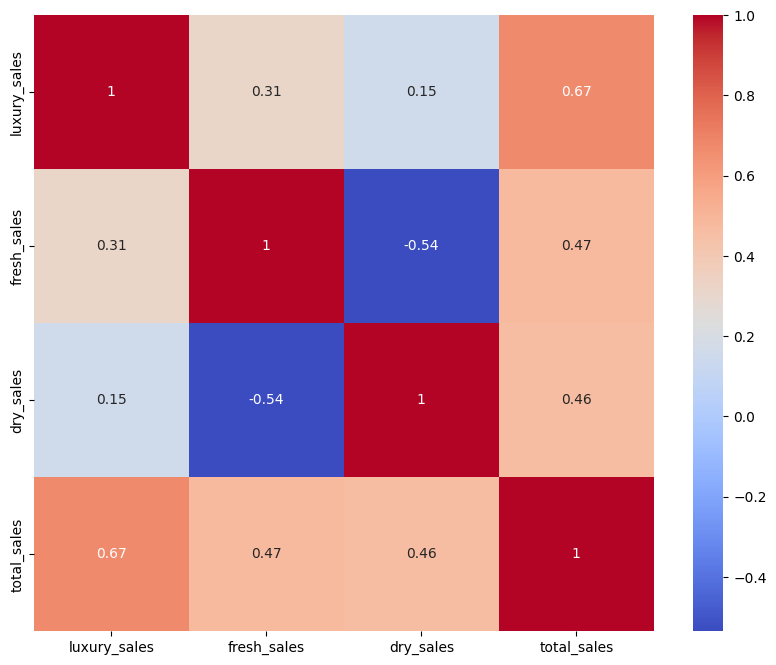

In [62]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

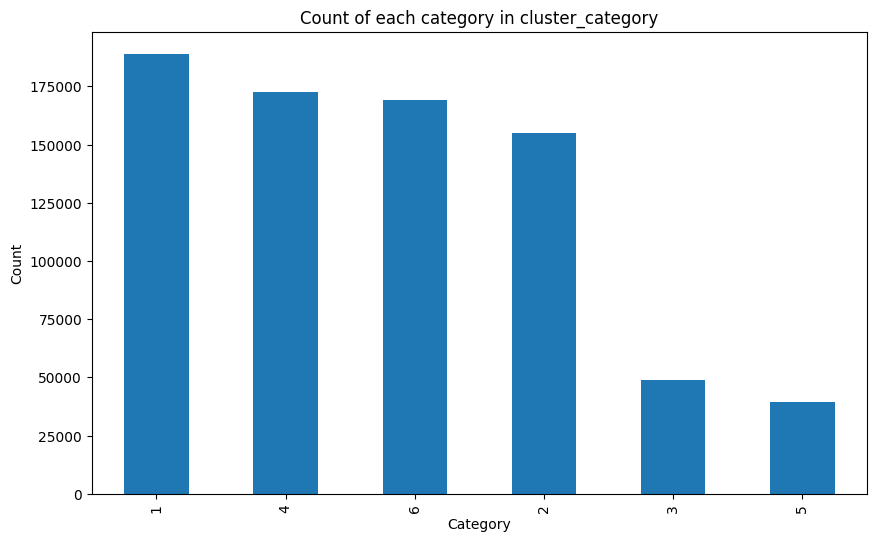

In [63]:
# Count the occurrences of each category
category_counts = data['cluster_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of each category in cluster_category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

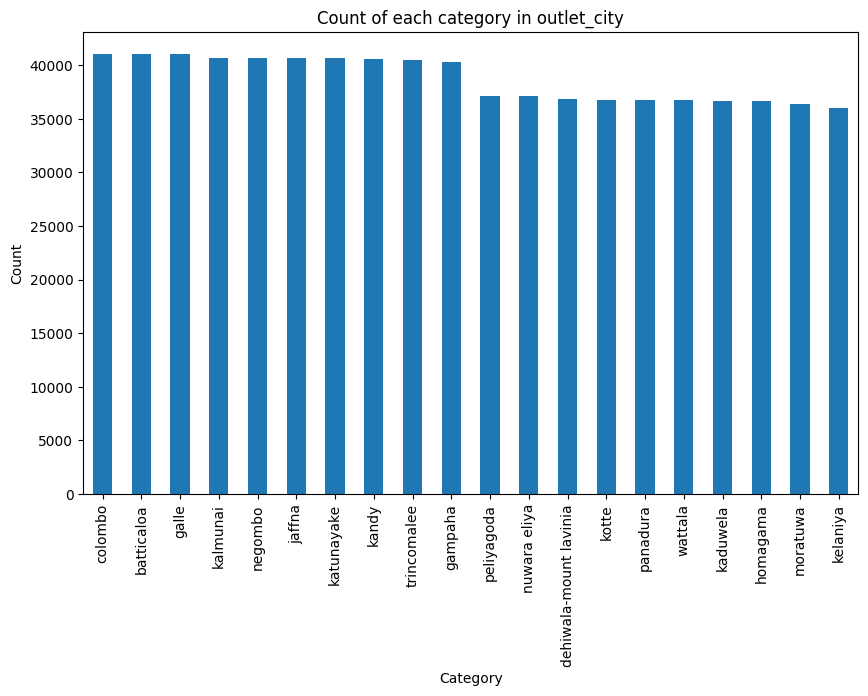

In [64]:
# Count the occurrences of each category
category_counts = data['outlet_city'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of each category in outlet_city')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

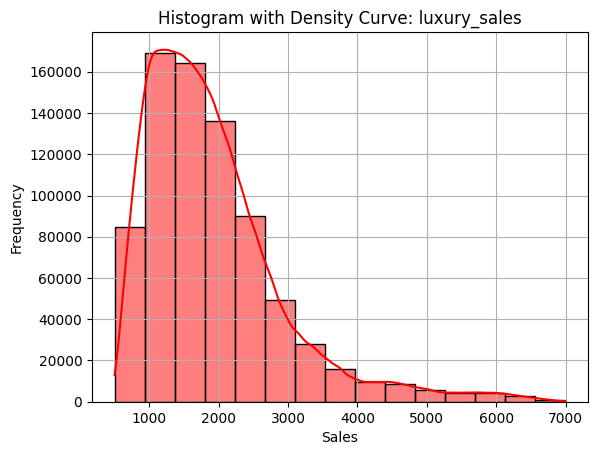

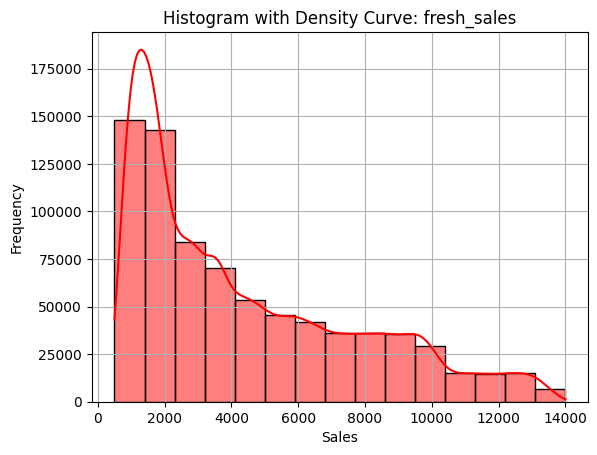

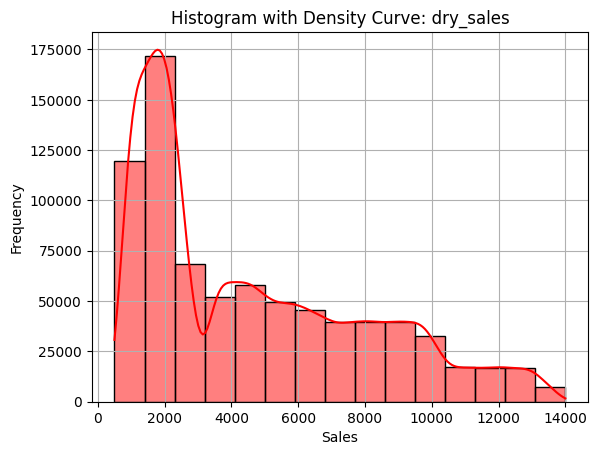

In [65]:
# List of sales columns
sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

# For each sales column, create a histogram with density curve overlaid
for col in sales_columns:
    plt.figure()
    data[col].hist(density=True, bins=15, alpha=0.6, color='g')
    sns.histplot(data[col], kde=True, bins=15, color='r')
    plt.title(f'Histogram with Density Curve: {col}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()

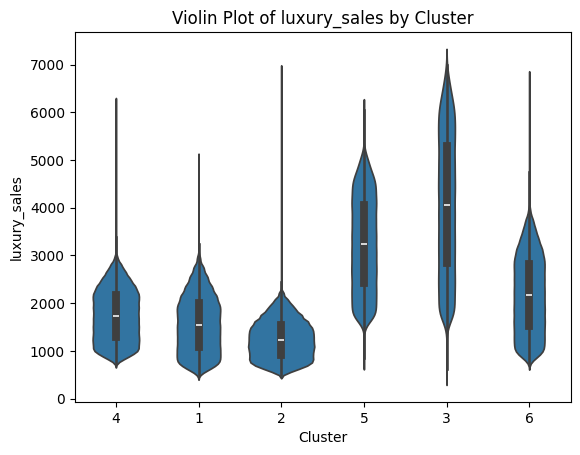

In [66]:
# Create the violin plot
sns.violinplot(x='cluster_category', y='luxury_sales', data=data)
plt.title('Violin Plot of luxury_sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('luxury_sales')
plt.show()

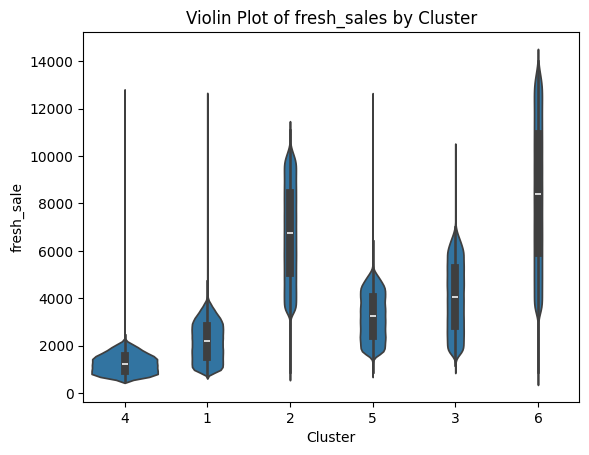

In [67]:
# Create the violin plot
sns.violinplot(x='cluster_category', y='fresh_sales', data=data)
plt.title('Violin Plot of fresh_sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('fresh_sale')
plt.show()

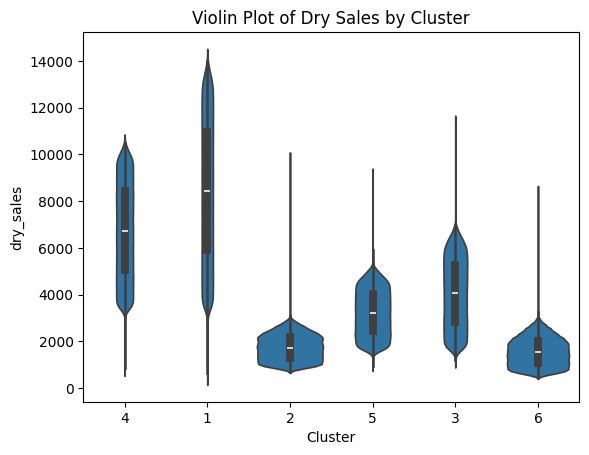

In [68]:
# Create the violin plot
sns.violinplot(x='cluster_category', y='dry_sales', data=data)
plt.title('Violin Plot of Dry Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('dry_sales')
plt.show()

In [69]:
# Splitting the data into features and target variable
X = data.drop(['cluster_category','Customer_ID','luxury_sales_bin','Council'], axis=1)
y = data['cluster_category']

In [70]:
X.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,total_sales
0,kelaniya,1209.60,756.00,5292.00,7257.60
1,moratuwa,1590.12,1060.08,6007.12,8657.32
2,wattala,2288.88,1481.04,9155.52,12925.44
3,wattala,2274.94,1739.66,9099.76,13114.36
4,kelaniya,2345.49,2069.55,9243.99,13659.03


In [71]:
y.head()

0    4
1    1
2    4
3    4
4    4
Name: cluster_category, dtype: object

In [72]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
print(X_train.dtypes == 'object')

outlet_city      True
luxury_sales    False
fresh_sales     False
dry_sales       False
total_sales     False
dtype: bool


#Implement Encoding

In [74]:
# dummy_rows = pd.DataFrame({
#     'outlet_city': ['anuradhapura','madawachiya'],
#     'luxury_sales': [0, 0],
#     'fresh_sales': [0, 0],
#     'dry_sales': [0, 0],
#     'total_sales': [0, 0],
#     })
# X_train = pd.concat([X_train, dummy_rows], ignore_index=True)

In [75]:
# Specify object columns
object_cols = ['outlet_city']

In [76]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in object_cols:
#     X_train[col] = label_encoder.fit_transform(X_train[col])
#     X_test[col] = label_encoder.transform(X_test[col])

In [77]:
# le = LabelEncoder()
# X_train['outlet_city'] = le.fit_transform(X_train['outlet_city'])

# # Create a mapping of the label encoder
# city_mapping = {label: index for index, label in enumerate(le.classes_)}

# # Encode the test set
# def encode_city(city):
#     return city_mapping.get(city, -1)  # Assign -1 for unseen categories

# X_test['outlet_city'] = X_test['outlet_city'].apply(encode_city)

In [79]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

# Ensure all columns have string type
X_train.columns = OH_X_train.columns.astype(str)
X_test.columns = OH_X_test.columns.astype(str)

In [80]:
#X_train.to_csv('trainingModel.csv')
#X_test.to_csv('testModel.csv')

## Standerdizing Features

In [82]:
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales'] #, 'total_sales'

In [83]:
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [84]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
# X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [85]:
print(X_train[:10])

        luxury_sales  fresh_sales  dry_sales  total_sales    0    1    2    3  \
668401      0.856008     2.058850  -0.843603     1.262076  0.0  0.0  0.0  0.0   
123714     -1.125242    -1.122384  -0.349477    -1.579681  0.0  0.0  0.0  0.0   
187746     -0.115348     1.265026  -0.652639     0.488320  0.0  0.0  0.0  0.0   
165088     -1.054719    -1.069450  -0.241276    -1.419094  0.0  0.0  1.0  0.0   
134234      0.263256    -0.803591   1.448805     0.658718  0.0  0.0  0.0  0.0   
763455      2.045130     0.018308  -0.130618     0.434842  0.0  0.0  0.0  0.0   
464986     -0.882984    -0.791789   0.449910    -0.518720  0.0  1.0  0.0  0.0   
534389     -0.050084    -0.566238   1.333007     0.679943  0.0  0.0  0.0  1.0   
166320     -0.977622    -1.065032  -0.158290    -1.321331  0.0  0.0  0.0  0.0   
720789     -0.318490     0.714630  -1.018949    -0.368369  0.0  0.0  0.0  0.0   

          4    5  ...   10   11   12   13   14   15   16   17   18   19  
668401  0.0  0.0  ...  0.0  0.0  0

## Principle Component Analysis

In [86]:
# from sklearn.decomposition import PCA

# # Apply PCA to the training data
# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)

# # Apply the fitted PCA to the test data
# X_test = pca.transform(X_test)

In [87]:
X_train.shape

(619316, 24)

In [88]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [89]:
X_train.shape

(619316, 24)

In [90]:
#print(X_train)

## Defining Pipeline

In [91]:
# # Define the preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('outlet_city', OneHotEncoder(handle_unknown='ignore', sparse_output=False), object_cols),
#         ('numeric', StandardScaler(), columns_to_scale)
#     ]
# )

# # Create a pipeline with the preprocessor and the classifier
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# # # Define the pipeline with SMOTE and the classifier
# # model = ImbPipeline(steps=[
# #     ('preprocessor', preprocessor),
# #     ('smote', SMOTE(random_state=42)),
# #     ('classifier', KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski'))
# # ])

## Trying different Model

In [92]:
# Models to be used
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
#     "Decision Tree": DecisionTreeClassifier(max_depth=5),
#     "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
#     "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1),
#     "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=False)
#     OneVsRestClassifier(SVC())
# }

In [93]:
#from sklearn.multiclass import OneVsRestClassifier


In [94]:
#pip install scikit-optimize

In [95]:
# from skopt import BayesSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the search space
# search_spaces = {
#     'n_estimators': (50, 200),
#     'max_depth': (10, 30),
#     'min_samples_split': (2, 10),
#     'min_samples_leaf': (1, 4)
# }

# # Initialize the classifier
# clf = RandomForestClassifier(random_state=42)

# # Initialize BayesSearchCV
# bayes_search = BayesSearchCV(estimator=clf, search_spaces=search_spaces, n_iter=32, cv=5, n_jobs=-1, verbose=2, random_state=42)

# # Fit BayesSearchCV
# bayes_search.fit(X_train, y_train)

# # Best parameters and estimator
# print("Best parameters found: ", bayes_search.best_params_)
# best_clf = bayes_search.best_estimator_

# # Evaluate the best model
# y_pred = best_clf.predict(X_test_pca)
# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [97]:
# model
model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred_lr = model.predict(X_train)
y_test_pred_lr = model.predict(X_test)

## Evaluate Train and Test dataset

In [98]:
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(train_accuracy_lr))
print('----------------------------------')
print('Model performance for Test set')
print("- Accuracy: {:.4f}".format(test_accuracy_lr))

Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9998


#### Selected Model -> K-Neighbours Classifier Algorithm was selected out of the Algorithms we tried out.

In [99]:
# #Calculate precision, recall, and F1-score
# precision_svc = precision_score(y_test, y_test_pred_lr)
# recall_svc = recall_score(y_test, y_test_pred_lr)
# f1_svc = f1_score(y_test, y_test_pred_lr)

# print("- Precision: {:.4f}".format(precision_svc))
# print("- Recall: {:.4f}".format(recall_svc))
# print("- F1-score: {:.4f}".format(f1_svc))

In [100]:
# # Fit the model
# svc = SVC(probability=True)
# svc.fit(X_train, y_train)

# # Make predictions
# y_train_pred_svc = svc.predict(X_train)
# y_test_pred_svc = svc.predict(X_test)

# # Evaluate Train and Test dataset
# train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
# test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)

# # Calculate precision, recall, and F1-score
# # precision_svc = precision_score(y_test, y_test_pred_svc, average='weighted')
# # recall_svc = recall_score(y_test, y_test_pred_svc, average='weighted')
# # f1_svc = f1_score(y_test, y_test_pred_svc, average='weighted')

# # Calculate AUC-ROC
# # y_test_prob_svc = svc.predict_proba(X_test)
# # auc_roc_svc = roc_auc_score(y_test, y_test_prob_svc, multi_class='ovr')

# print("Support Vector Classifier")
# print('Model performance for Training set')
# print("- Accuracy: {:.4f}".format(train_accuracy_svc))
# print('----------------------------------')
# print('Model performance for Test set')
# print("- Accuracy: {:.4f}".format(test_accuracy_svc))
# # print("- Precision: {:.4f}".format(precision_svc))
# # print("- Recall: {:.4f}".format(recall_svc))
# # print("- F1-score: {:.4f}".format(f1_svc))
# # print("- AUC-ROC: {:.4f}".format(auc_roc_svc))

In [101]:
X_train.head()

,luxury_sales,fresh_sales,dry_sales,total_sales,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
668401,0.856008,2.058850,-0.843603,1.262076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123714,-1.125242,-1.122384,-0.349477,-1.579681,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187746,-0.115348,1.265026,-0.652639,0.488320,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165088,-1.054719,-1.069450,-0.241276,-1.419094,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134234,0.263256,-0.803591,1.448805,0.658718,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
